# Introduction to FHySA (French Hydrological Signatures Analysis): creating a watershed object and retrieving its properties

The notebook presents the basic methods to retrieve some watershed characteristics (landscape characteristics) and some hydrological signatures

## Create a watershed object and retrieve its contour

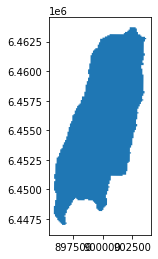

In [1]:
# import the watershed class
from Watershed import Watershed
# create an object of the watershed class
watershed_name = 'Le Meaudret à Méaudre'
code = 'W3315010'
watershed_test = Watershed(code, watershed_name)
# extract its contour from the shapefile
shp_contour_filepath = './TestData/BH/W3315010_contour.shp'
watershed_test.extract_watershed_contour_from_filename(shp_contour_filepath, 'Code')
# plot the contour
watershed_test.contour.plot()

In [2]:
watershed_test.__dict__

{'code': 'W3315010',
 'name': 'Le Meaudret à Méaudre',
 'contour':        Code  S_km2 dt_pstn                                           geometry
 0  W3315010  73.99    2018  POLYGON ((896003.291 6451284.491, 896003.291 6...,
 'hydrological_signatures': -1,
 'geologic_properties': -1,
 'geomorphologic_properties': -1,
 'topographic_properties': -1,
 'hydro_climatic_fluxes': -1}

## Extract the discharge time series from the Data folder

In [3]:
banquehydro_foldername = './TestData/BH/'
watershed_test.extract_banquehydro_discharge_timeseries(banquehydro_foldername)
# plot the discharge time series
watershed_test.hydro_climatic_fluxes.discharge_timeseries.head()

Datetime         Q
0 1972-03-31  1.774703
1 1972-04-01  1.692973
2 1972-04-02  1.984865
3 1972-04-03  1.611243
4 1972-04-04  1.459459

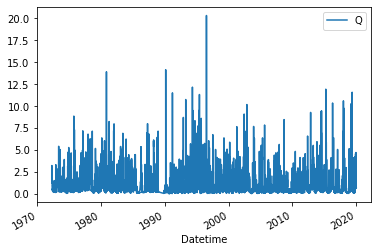

In [4]:
# plot the discharge time series
watershed_test.hydro_climatic_fluxes.discharge_timeseries.plot(x='Datetime',y='Q')

## Extract the Hydrological Signatures from the discharge time series

In [5]:
watershed_test.extract_hydrological_signatures('discharge_based')
# get the watershed hydro signatures
watershed_test.hydrological_signatures.__dict__

{'q_mean': 0.7366634850312953,
 'bfi': 0.4172401274457133,
 'bf_magni': 0.8473487742207106,
 'tau_1': 4.353037158794285,
 'tau_2': 25.85632277542854,
 'tau_roques': 14.138312679918823,
 'a_q': 2.5952830111989726,
 'b_q': 3.193457009849764,
 'fdc_slope': 1.3113807308827459,
 'fdc_quantile90': 0.09282162162162162,
 'fdc_quantile10': 1.7747027027027027,
 'runoff_ratio': -1,
 'aridity_ratio': -1}

## Extract some geologic properties

In [6]:
# BD Lisa : main hydrogeologic classes
BDLisa_shp = './TestData/GEOL/BDLisa_regional_hydrology_sample.shp'
watershed_test.extract_geologic_properties(BDLisa_shp)
watershed_test.geologic_properties.__dict__


TypeError: 'gdf' should be GeoDataFrame or GeoSeries, got <class 'str'>

In [ ]:
# BRGM geologic map 1/1000000e get the main ages (in Ma)
BRGM_geol_map = './TestData/GEOL/GEO001M_CART_FR_S_FGEOL_2154_sample.shp'
watershed_test.geologic_properties.extract_average_age_geology(BRGM_geol_map, watershed_test.contour)
watershed_test.geologic_properties.__dict__